In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment 

In [2]:
datat = pd.read_csv(r'C:\Users\user\Downloads\titanic_dataset.csv')

In [3]:
datat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [4]:
datat.set_index('PassengerId', inplace=True)

# 3. Check the basic details of the dataset

In [5]:
datat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
datat.shape

(891, 11)

In [7]:
datat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
datat.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
datat.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
datat.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
for column in ['Age', 'Cabin', 'Embarked']:
    if column == 'Age':
        datat[column] = datat[column].fillna(datat[column].mean())
    elif column == 'Embarked':
        datat[column] = datat[column].fillna(datat[column].mode()[0])
    elif column == 'Cabin':
        datat[column] = datat[column].fillna('Unknown')

In [12]:
datat.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset 

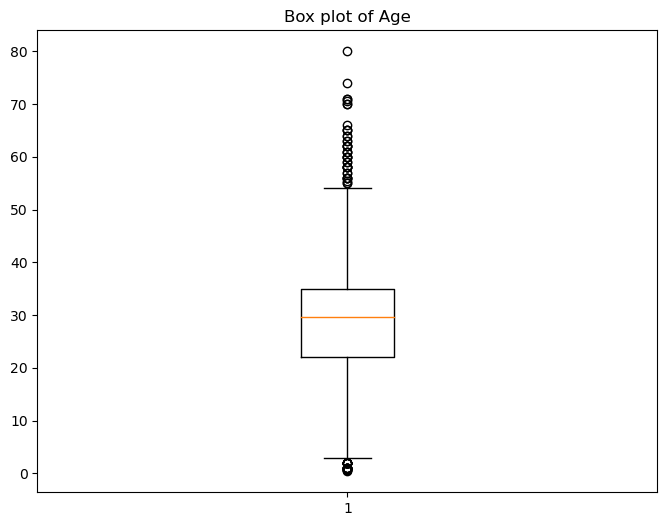

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(datat['Age'])
plt.title('Box plot of Age');
plt.show()

In [14]:
Q1 = datat['Age'].quantile(0.25)
Q3 = datat['Age'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
Q1

22.0

In [16]:
Q3

35.0

In [17]:
IQR

13.0

In [18]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3 + 1.5*IQR

In [19]:
low_limit

2.5

In [20]:
upr_limit

54.5

In [21]:
outlier = []
for x in datat['Age']:
    if x>upr_limit or x<low_limit :
        outlier.append(x)

In [22]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [23]:
ind = (datat['Age'] < low_limit) | (datat['Age'] > upr_limit)
outlier_index = datat.loc[ind].index
outlier_index

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [24]:
datat.drop(outlier_index, inplace = True)

In [25]:
datat.shape

(825, 11)

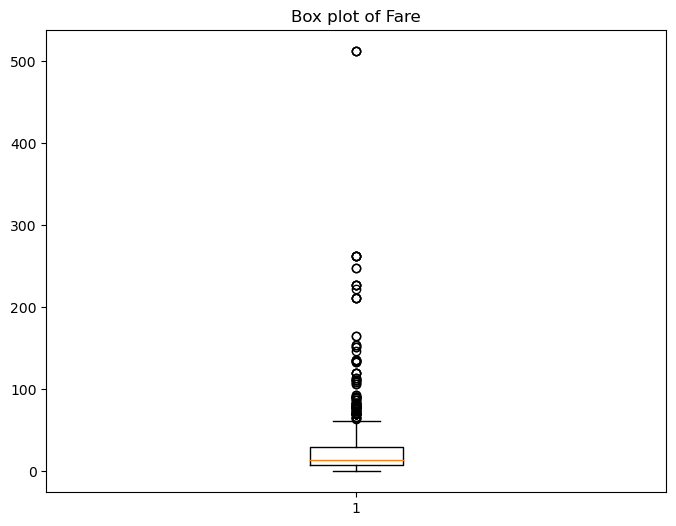

In [26]:
plt.figure(figsize=(8, 6))
plt.boxplot(datat['Fare'])
plt.title('Box plot of Fare');
plt.show()

In [27]:
Q1 = datat['Fare'].quantile(0.25)
Q3 = datat['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [28]:
Q1

7.8958

In [29]:
Q3

30.0708

In [30]:
IQR

22.174999999999997

In [31]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [32]:
lower_limit

-25.366699999999994

In [33]:
upper_limit

63.333299999999994

In [34]:
outlier = []
for x in datat['Fare']:
    if x>upper_limit or x<lower_limit :
        outlier.append(x)

In [35]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [36]:
ind1 = datat['Fare'] > upper_limit
outlier_index1 = datat.loc[ind1].index
outlier_index1

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [37]:
datat.drop(outlier_index1, inplace = True)

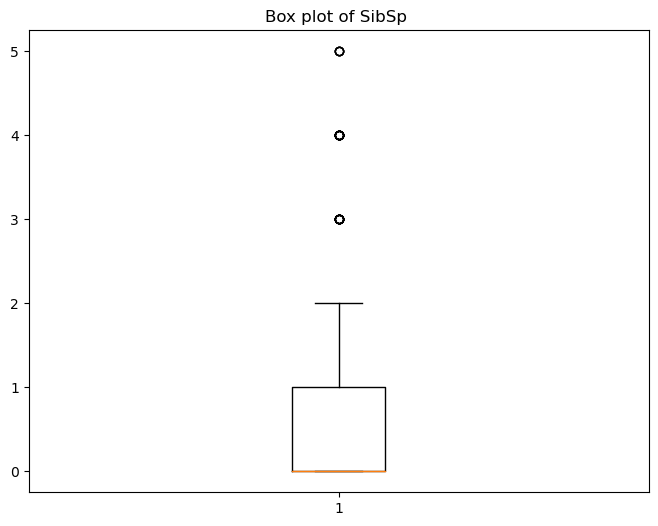

In [38]:
plt.figure(figsize=(8, 6))
plt.boxplot(datat['SibSp'])
plt.title('Box plot of SibSp ');
plt.show()

In [39]:
Q1 = datat['SibSp'].quantile(0.25)
Q3 = datat['SibSp'].quantile(0.75)
IQR = Q3 - Q1

In [40]:
Q1

0.0

In [41]:
Q3

1.0

In [42]:
IQR

1.0

In [43]:
lower_lt = Q1 - 1.5*IQR
upper_lt = Q3 + 1.5*IQR

In [44]:
lower_lt

-1.5

In [45]:
upper_lt

2.5

In [46]:
outlier = []
for x in datat['SibSp']:
    if x>upper_lt or x<lower_lt :
        outlier.append(x)

In [47]:
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [48]:
ind2 = datat['SibSp']>upper_lt
outlier_index2 = datat.loc[ind2].index
outlier_index2

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [49]:
datat.drop(outlier_index2, inplace = True)

In [50]:
datat.shape

(689, 11)

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [51]:
datat.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q


In [52]:
x = datat.drop('Survived',axis = 1) # since it is the dependent feature

In [53]:
y = datat['Survived']

In [54]:
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
6,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q


In [55]:
y.head()

PassengerId
1    0
3    1
4    1
5    0
6    0
Name: Survived, dtype: int64

In [56]:
x.Name.nunique()

689

In [57]:
x = x.drop(['Name', 'Ticket'],axis = 1)      # Name and Ticket columns may not provide significant predictive power. 
                                             # It can be dropped to reduce dimensionality.

In [58]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,22.000000,1,0,7.2500,Unknown,S
3,3,female,26.000000,0,0,7.9250,Unknown,S
4,1,female,35.000000,1,0,53.1000,C123,S
5,3,male,35.000000,0,0,8.0500,Unknown,S
6,3,male,29.699118,0,0,8.4583,Unknown,Q


In [59]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [60]:
columns_to_encode = ['Sex', 'Cabin', 'Embarked']

In [61]:
x[columns_to_encode] = encoder.fit_transform(x[columns_to_encode])

In [62]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,1.0,22.000000,1,0,7.2500,73.0,2.0
3,3,0.0,26.000000,0,0,7.9250,73.0,2.0
4,1,0.0,35.000000,1,0,53.1000,27.0,2.0
5,3,1.0,35.000000,0,0,8.0500,73.0,2.0
6,3,1.0,29.699118,0,0,8.4583,73.0,1.0


In [63]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range = (0,1))
x = min_max.fit_transform(x)

In [64]:
type(x)

numpy.ndarray

In [65]:
x = pd.DataFrame(x)

In [66]:
type(x)

pandas.core.frame.DataFrame

In [67]:
x.head()

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.372549,0.5,0.0,0.118118,1.000000,1.0
1,1.0,0.0,0.450980,0.0,0.0,0.129115,1.000000,1.0
2,0.0,0.0,0.627451,0.5,0.0,0.865114,0.369863,1.0
3,1.0,1.0,0.627451,0.0,0.0,0.131152,1.000000,1.0
4,1.0,1.0,0.523512,0.0,0.0,0.137804,1.000000,0.5


In [68]:
x.describe()

,0,1,2,3,4,5,6,7
count,689.000000,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000,689.000000
mean,0.746734,0.687954,0.511781,0.13643,0.044993,0.270959,0.934052,0.799710
std,0.361793,0.463665,0.187116,0.25051,0.125771,0.213306,0.195195,0.368372
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.392157,0.00000,0.000000,0.127962,1.000000,1.000000
50%,1.000000,1.000000,0.523512,0.00000,0.000000,0.171068,1.000000,1.000000
75%,1.000000,1.000000,0.588235,0.00000,0.000000,0.382051,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [72]:
x.columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin','Embarked']

In [73]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1.0,1.0,0.372549,0.5,0.0,0.118118,1.000000,1.0
1,1.0,0.0,0.450980,0.0,0.0,0.129115,1.000000,1.0
2,0.0,0.0,0.627451,0.5,0.0,0.865114,0.369863,1.0
3,1.0,1.0,0.627451,0.0,0.0,0.131152,1.000000,1.0
4,1.0,1.0,0.523512,0.0,0.0,0.137804,1.000000,0.5
